Decision Trees:

By - Maddy

Vectorization:

-> BOW

-> TFIDF

-> AVG W2V

-> TFIDF W2V

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import sqlite3
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
import os
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import wordcloud
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from IPython.display import SVG
from graphviz import Source

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score !=3 limit 80000""", conn)
    conn.close()
else:
    print("Please the above cell")
    
final.sort_values('Time')
#print (final.sort_values('Time'))

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
330,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
423,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...
245,346116,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,one movi movi collect fill comedi action whate...
308,346041,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
215,70688,76882,B00002N8SM,A32DW342WBJ6BX,Buttersugar,0,0,positive,948672000,A sure death for flies,I bought a few of these after my apartment was...,bought apart infest fruit fli hour trap mani f...
261,346141,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,positive,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,happen say name three time michael keaten star...
325,346094,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,positive,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,get crazi look beatlejuic french version video...


In [3]:
print (final.shape)

(80000, 12)


In [4]:
print(final['CleanedText'].values)

['witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'
 'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open'
 'fun way children learn month year learn poem throughout school year like handmot invent poem'
 ...
 'found small can local kroger like small much better deal tasti snack'
 'love snack tasti also qualiti realli good get yummi snack'
 'asian rice cracker mix basic one greater varieti cracker also quit bit larger use one size big gumbal perhap reason instead packag bag cracker simpli burst flavor scare eat whole singl sit']


In [5]:
#Pretty Table
x = PrettyTable(["Vectorizer","Model","mac_depth","min_split","Accuracy","ROC Score"])
print(x)

+------------+-------+-----------+-----------+----------+-----------+
| Vectorizer | Model | mac_depth | min_split | Accuracy | ROC Score |
+------------+-------+-----------+-----------+----------+-----------+
+------------+-------+-----------+-----------+----------+-----------+


### BAG OF WORDS 

In [6]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:60000]
testX_data= final['CleanedText'].values[60000:]
trainY_data=final['Score'].values[0:60000]
testY_data=final['Score'].values[60000:]

#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)

feature=count_vect.get_feature_names()

#Vectorising test data
final_counts_test=count_vect.transform(testX_data)


In [7]:
X_train=final_counts_train
X_test =final_counts_test
y_train=trainY_data
y_test=testY_data

z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_test = y_test.map(z)


In [8]:

PARAMS = {
    'max_depth': [1, 5, 10, 50, 100, 500, 100],
    'min_samples_split': [5, 10, 100, 500]
}



Best parameters {'max_depth': 50, 'min_samples_split': 500}
ROC Score 0.6550774147243359

 Test accuracy 87.660000%


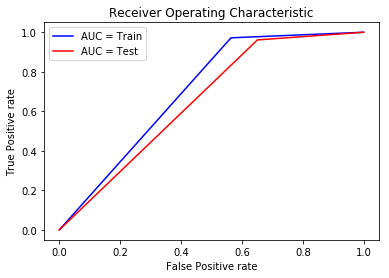

In [9]:
dec = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dec,param_grid=PARAMS, scoring='roc_auc',cv=3)
clf.fit(X_train,y_train)
param=clf.best_params_
best_depth=param['max_depth']
best_split=param['min_samples_split']
pred_test=clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)
print("Best parameters",param)
print("ROC Score",roc_score_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n Test accuracy %f%%' %(acc))
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
x.add_row(['BOW','Decision Tree',best_depth,best_split,acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


In [10]:
dec = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_split)
dec.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
importances = dec.feature_importances_
coefs_with_fns = sorted(zip(importances, feature))
print("The most important features for our model is:")
top = coefs_with_fns[-11:-1]
for a,b in top:
    print(b)

The most important features for our model is:
threw
delici
wast
bad
return
worst
love
best
money
great


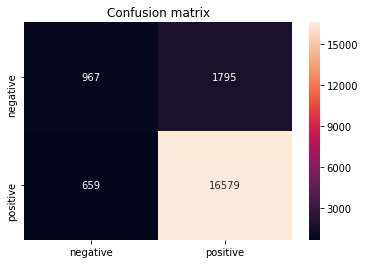

In [113]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### Graphiviz

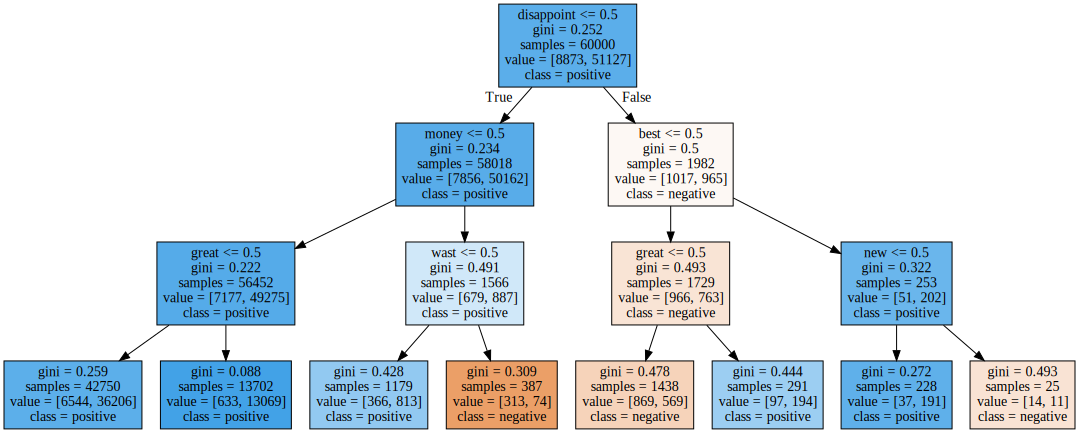

In [114]:

dec = DecisionTreeClassifier(max_depth=3,min_samples_split=3)
dec.fit(X_train,y_train)

graph = Source(tree.export_graphviz(dec, out_file=None
   , feature_names=feature, class_names=['negative', 'positive'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

### TFIDF

In [115]:
import warnings
warnings.filterwarnings("ignore")
#Vectorizing using TFIDF
#TF IDF Vectorizing

trainX_data=final['CleanedText'].values[0:60000]
testX_data= final['CleanedText'].values[60000:]
trainY_data=final['Score'].values[0:60000]
testY_data=final['Score'].values[60000:]

tf_idf_vect = TfidfVectorizer(max_features=2000,min_df=50)
final_tf_idf_train = tf_idf_vect.fit_transform(trainX_data)

feature=tf_idf_vect.get_feature_names()

    
final_tf_idf_test=tf_idf_vect.transform(testX_data)


In [116]:
import warnings
warnings.filterwarnings("ignore")
X_train=final_tf_idf_train
X_test =final_tf_idf_test
y_train=trainY_data
y_test=testY_data

z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_test = y_test.map(z)


In [117]:
PARAMS = {
    'max_depth': [1, 5, 10, 50, 100, 500, 100],
    'min_samples_split': [5, 10, 100, 500]
}




Best parameters {'max_depth': 50, 'min_samples_split': 500}
ROC Score 0.6507335560869134

 Test accuracy 86.885000%


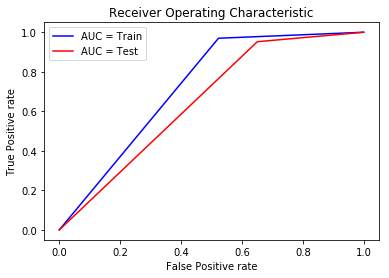

In [118]:
dec = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dec,param_grid=PARAMS, scoring='roc_auc',cv=3)
clf.fit(X_train,y_train)
param=clf.best_params_
best_depth=param['max_depth']
best_split=param['min_samples_split']
pred_test=clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)
print("Best parameters",param)
print("ROC Score",roc_score_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n Test accuracy %f%%' %(acc))
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
x.add_row(['TFIDF','Decision Tree',best_depth,best_split,acc,roc_score_test])

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


In [119]:
dec = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_split)
dec.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
importances = dec.feature_importances_
coefs_with_fns = sorted(zip(importances, feature))
print("The most important features for our model is:")
top = coefs_with_fns[-11:-1]
for a,b in top:
    print(b)

The most important features for our model is:
threw
wast
terribl
bad
return
worst
love
best
money
great


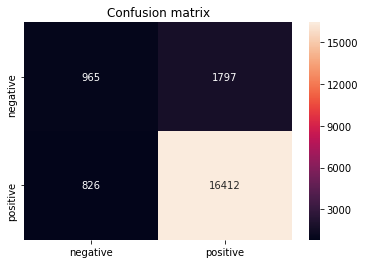

In [121]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

## Graphiviz

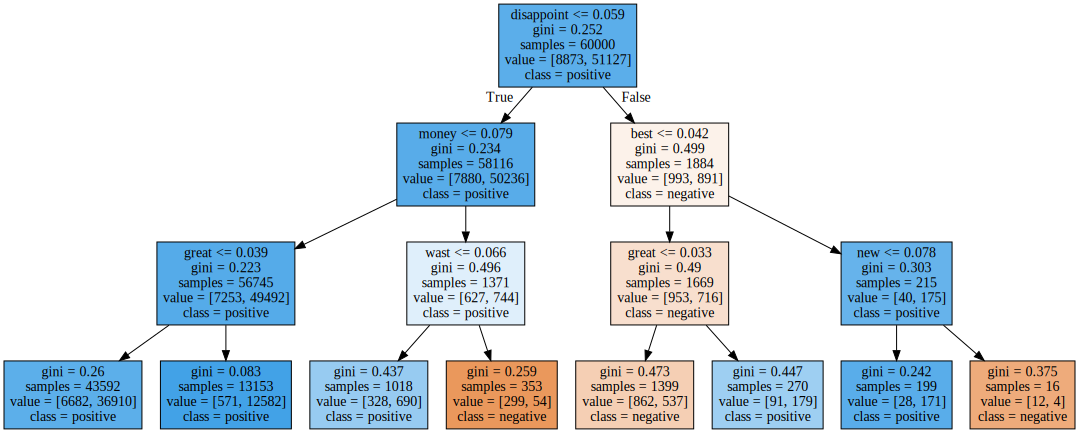

In [122]:

dec = DecisionTreeClassifier(max_depth=3,min_samples_split=3)
dec.fit(X_train,y_train)

graph = Source(tree.export_graphviz(dec, out_file=None
   , feature_names=feature, class_names=['negative', 'positive'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

### AVG W2V

In [123]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:60000]

i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:60000]



number of words that occured minimum 5 times  10210
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']




  0%|                                                                                        | 0/60000 [00:00<?, ?it/s]

  0%|▏                                                                           | 104/60000 [00:00<00:57, 1036.83it/s]

  0%|▎                                                                           | 238/60000 [00:00<00:55, 1076.40it/s]

  0%|▍                                                                            | 296/60000 [00:00<01:24, 708.55it/s]

  1%|▍                                                                            | 348/60000 [00:00<01:34, 634.55it/s]

  1%|▌                                                                            | 400/60000 [00:00<01:40, 594.77it/s]

  1%|▌                                                                            | 459/60000 [00:00<01:40, 592.92it/s]

  1%|▋                                                                            | 513/60000 [00:00<01:48, 547.20it/s]

  1%|▋                        

 16%|████████████                                                                | 9520/60000 [00:15<01:07, 742.47it/s]

 16%|████████████▏                                                               | 9608/60000 [00:15<01:05, 770.32it/s]

 16%|████████████▎                                                               | 9709/60000 [00:15<01:02, 806.81it/s]

 16%|████████████▍                                                               | 9792/60000 [00:15<01:02, 804.82it/s]

 16%|████████████▌                                                               | 9875/60000 [00:15<01:01, 810.82it/s]

 17%|████████████▌                                                               | 9958/60000 [00:15<01:01, 816.06it/s]

 17%|████████████▌                                                              | 10041/60000 [00:15<01:06, 746.09it/s]

 17%|████████████▋                                                              | 10118/60000 [00:16<01:15, 660.93it/s]

 17%|████████████▋              

 33%|████████████████████████▍                                                  | 19525/60000 [00:30<01:20, 504.14it/s]

 33%|████████████████████████▍                                                  | 19587/60000 [00:30<01:15, 533.67it/s]

 33%|████████████████████████▌                                                  | 19651/60000 [00:30<01:11, 561.40it/s]

 33%|████████████████████████▋                                                  | 19712/60000 [00:31<01:10, 575.12it/s]

 33%|████████████████████████▋                                                  | 19771/60000 [00:31<01:09, 575.47it/s]

 33%|████████████████████████▊                                                  | 19830/60000 [00:31<01:12, 553.59it/s]

 33%|████████████████████████▉                                                  | 19900/60000 [00:31<01:10, 568.60it/s]

 33%|████████████████████████▉                                                  | 19958/60000 [00:31<01:11, 562.55it/s]

 33%|█████████████████████████  

 49%|████████████████████████████████████▌                                      | 29205/60000 [00:45<00:47, 641.70it/s]

 49%|████████████████████████████████████▌                                      | 29270/60000 [00:45<00:47, 640.25it/s]

 49%|████████████████████████████████████▋                                      | 29343/60000 [00:46<00:47, 642.43it/s]

 49%|████████████████████████████████████▊                                      | 29408/60000 [00:46<00:51, 597.88it/s]

 49%|████████████████████████████████████▊                                      | 29492/60000 [00:46<00:48, 631.51it/s]

 49%|████████████████████████████████████▉                                      | 29557/60000 [00:46<00:50, 608.71it/s]

 49%|█████████████████████████████████████                                      | 29619/60000 [00:46<00:51, 584.60it/s]

 49%|█████████████████████████████████████                                      | 29679/60000 [00:46<00:53, 570.79it/s]

 50%|███████████████████████████

 65%|█████████████████████████████████████████████████                          | 39201/60000 [01:00<00:33, 622.46it/s]

 66%|█████████████████████████████████████████████████▏                         | 39311/60000 [01:01<00:29, 698.04it/s]

 66%|█████████████████████████████████████████████████▏                         | 39394/60000 [01:01<00:28, 731.39it/s]

 66%|█████████████████████████████████████████████████▎                         | 39471/60000 [01:01<00:27, 742.45it/s]

 66%|█████████████████████████████████████████████████▍                         | 39548/60000 [01:01<00:28, 716.57it/s]

 66%|█████████████████████████████████████████████████▌                         | 39622/60000 [01:01<00:30, 672.82it/s]

 66%|█████████████████████████████████████████████████▌                         | 39692/60000 [01:01<00:43, 464.74it/s]

 66%|█████████████████████████████████████████████████▋                         | 39749/60000 [01:01<00:47, 426.87it/s]

 66%|███████████████████████████

 81%|████████████████████████████████████████████████████████████▉              | 48793/60000 [01:15<00:19, 588.24it/s]

 81%|█████████████████████████████████████████████████████████████              | 48855/60000 [01:16<00:18, 596.92it/s]

 82%|█████████████████████████████████████████████████████████████▏             | 48935/60000 [01:16<00:17, 623.53it/s]

 82%|█████████████████████████████████████████████████████████████▎             | 49028/60000 [01:16<00:15, 690.41it/s]

 82%|█████████████████████████████████████████████████████████████▍             | 49116/60000 [01:16<00:14, 735.28it/s]

 82%|█████████████████████████████████████████████████████████████▍             | 49193/60000 [01:16<00:14, 730.00it/s]

 82%|█████████████████████████████████████████████████████████████▌             | 49269/60000 [01:16<00:16, 647.50it/s]

 82%|█████████████████████████████████████████████████████████████▋             | 49337/60000 [01:16<00:19, 547.34it/s]

 82%|███████████████████████████

 99%|██████████████████████████████████████████████████████████████████████████▍| 59539/60000 [01:31<00:01, 337.49it/s]

 99%|██████████████████████████████████████████████████████████████████████████▍| 59577/60000 [01:31<00:01, 319.20it/s]

 99%|██████████████████████████████████████████████████████████████████████████▌| 59619/60000 [01:31<00:01, 331.48it/s]

 99%|██████████████████████████████████████████████████████████████████████████▌| 59655/60000 [01:31<00:01, 328.24it/s]

 99%|██████████████████████████████████████████████████████████████████████████▌| 59690/60000 [01:32<00:01, 299.84it/s]

100%|██████████████████████████████████████████████████████████████████████████▋| 59722/60000 [01:32<00:01, 268.83it/s]

100%|██████████████████████████████████████████████████████████████████████████▋| 59751/60000 [01:32<00:00, 263.48it/s]

100%|██████████████████████████████████████████████████████████████████████████▋| 59779/60000 [01:32<00:00, 246.58it/s]

100%|███████████████████████████

60000


In [124]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[60000:]



i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[60000:]


number of words that occured minimum 5 times  5583
sample words  ['edward', 'son', 'organ', 'crouton', 'italian', 'herb', 'pack', 'know', 'watch', 'calori', 'eat', 'noth', 'low', 'cal', 'food', 'quit', 'part', 'diet', 'consist', 'big', 'salad', 'fat', 'progresso', 'soup', 'want', 'someth', 'extra', 'could', 'add', 'decid', 'tri', 'extrem', 'salti', 'asid', 'tast', 'would', 'order', 'admit', 'care', 'salt', 'use', 'overwhelm', 'understand', 'note', 'anchovi', 'pretzel', 'etc', 'like', 'long', 'dont']




  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]

  0%|▎                                                                             | 96/20000 [00:00<00:21, 943.31it/s]

  1%|▋                                                                            | 176/20000 [00:00<00:22, 892.32it/s]

  1%|█                                                                            | 275/20000 [00:00<00:21, 912.90it/s]

  2%|█▌                                                                           | 391/20000 [00:00<00:20, 970.69it/s]

  3%|██                                                                          | 550/20000 [00:00<00:17, 1090.08it/s]

  3%|██▍                                                                         | 649/20000 [00:00<00:18, 1019.48it/s]

  4%|██▊                                                                          | 745/20000 [00:00<00:21, 901.50it/s]

  4%|███▏                     

 70%|███████████████████████████████████████████████████▋                      | 13973/20000 [00:15<00:05, 1102.77it/s]

 70%|████████████████████████████████████████████████████▏                     | 14093/20000 [00:15<00:05, 1127.43it/s]

 71%|████████████████████████████████████████████████████▌                     | 14213/20000 [00:15<00:05, 1147.93it/s]

 72%|█████████████████████████████████████████████████████▏                    | 14375/20000 [00:15<00:04, 1214.97it/s]

 72%|█████████████████████████████████████████████████████▋                    | 14499/20000 [00:15<00:04, 1221.06it/s]

 73%|██████████████████████████████████████████████████████                    | 14623/20000 [00:15<00:04, 1109.70it/s]

 74%|██████████████████████████████████████████████████████▌                   | 14738/20000 [00:15<00:04, 1072.18it/s]

 74%|██████████████████████████████████████████████████████▉                   | 14848/20000 [00:16<00:04, 1078.83it/s]

 75%|███████████████████████████

20000


In [129]:
import warnings
warnings.filterwarnings("ignore")

#Train Test Split of W2V data
#creating the model with W2V and brute force KNN
X_train = sent_vectors_train
X_test = sent_vectors_test
Y_train = W2VScoretrain
Y_test = W2VScoretest

In [130]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_test = y_test.map(z)


In [131]:

PARAMS = {
    'max_depth': [1, 5, 10, 50, 100, 500, 100],
    'min_samples_split': [5, 10, 100, 500]
}

Best parameters {'max_depth': 10, 'min_samples_split': 500}
ROC Score 0.6038661448751848

 Test accuracy 81.610000%


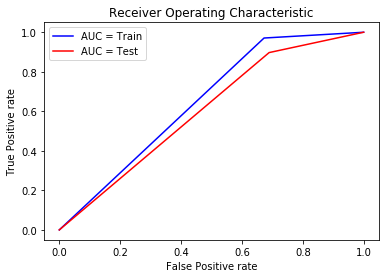

In [132]:
dec = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dec,param_grid=PARAMS, scoring='roc_auc',cv=3)
clf.fit(X_train,y_train)
param=clf.best_params_
best_depth=['max_depth']
best_split=param['min_samples_split']
pred_test=clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)
print("Best parameters",param)
print("ROC Score",roc_score_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n Test accuracy %f%%' %(acc))
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
x.add_row(['AVG BOW','Decision Tree',best_depth,best_split,acc,roc_score_test])

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


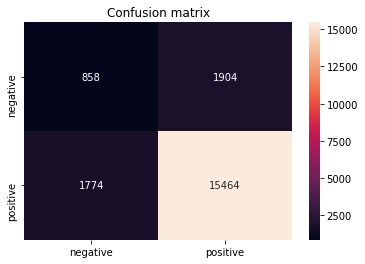

In [133]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### TFIDF W2V

In [134]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:60000]


i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:60000]


number of words that occured minimum 5 times  10210
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']




  0%|                                                                                        | 0/60000 [00:00<?, ?it/s]

  0%|                                                                              | 75/60000 [00:00<01:20, 740.54it/s]

  0%|▏                                                                            | 189/60000 [00:00<01:12, 827.33it/s]

  0%|▎                                                                            | 278/60000 [00:00<01:12, 819.54it/s]

  1%|▍                                                                            | 337/60000 [00:00<01:33, 639.36it/s]

  1%|▌                                                                            | 392/60000 [00:00<01:38, 603.23it/s]

  1%|▌                                                                            | 472/60000 [00:00<01:31, 648.42it/s]

  1%|▋                                                                            | 534/60000 [00:00<01:44, 568.31it/s]

  1%|▊                        

 17%|████████████▋                                                              | 10175/60000 [00:15<01:17, 639.38it/s]

 17%|████████████▊                                                              | 10241/60000 [00:15<01:22, 604.80it/s]

 17%|████████████▉                                                              | 10317/60000 [00:15<01:17, 639.85it/s]

 17%|████████████▉                                                              | 10383/60000 [00:15<01:16, 645.50it/s]

 17%|█████████████                                                              | 10449/60000 [00:15<01:32, 535.59it/s]

 18%|█████████████▏                                                             | 10507/60000 [00:15<01:31, 543.33it/s]

 18%|█████████████▏                                                             | 10580/60000 [00:16<01:24, 587.17it/s]

 18%|█████████████▎                                                             | 10679/60000 [00:16<01:13, 668.70it/s]

 18%|█████████████▍             

 34%|█████████████████████████▎                                                 | 20254/60000 [00:30<01:11, 552.13it/s]

 34%|█████████████████████████▍                                                 | 20322/60000 [00:30<01:07, 584.18it/s]

 34%|█████████████████████████▌                                                 | 20403/60000 [00:30<01:04, 617.55it/s]

 34%|█████████████████████████▌                                                 | 20466/60000 [00:30<01:03, 617.72it/s]

 34%|█████████████████████████▋                                                 | 20535/60000 [00:31<01:04, 613.55it/s]

 34%|█████████████████████████▊                                                 | 20612/60000 [00:31<01:00, 650.25it/s]

 34%|█████████████████████████▊                                                 | 20681/60000 [00:31<01:02, 629.75it/s]

 35%|█████████████████████████▉                                                 | 20745/60000 [00:31<01:03, 621.50it/s]

 35%|██████████████████████████ 

 51%|██████████████████████████████████████▍                                    | 30762/60000 [00:46<00:48, 607.56it/s]

 51%|██████████████████████████████████████▌                                    | 30829/60000 [00:46<00:46, 621.12it/s]

 51%|██████████████████████████████████████▌                                    | 30896/60000 [00:46<00:45, 634.48it/s]

 52%|██████████████████████████████████████▋                                    | 30984/60000 [00:46<00:43, 671.11it/s]

 52%|██████████████████████████████████████▊                                    | 31054/60000 [00:46<00:45, 637.63it/s]

 52%|██████████████████████████████████████▉                                    | 31120/60000 [00:46<00:44, 643.31it/s]

 52%|██████████████████████████████████████▉                                    | 31186/60000 [00:46<00:48, 591.21it/s]

 52%|███████████████████████████████████████                                    | 31269/60000 [00:46<00:45, 629.98it/s]

 52%|███████████████████████████

 69%|████████████████████████████████████████████████████                       | 41602/60000 [01:00<00:24, 737.04it/s]

 69%|████████████████████████████████████████████████████                       | 41681/60000 [01:01<00:24, 749.97it/s]

 70%|████████████████████████████████████████████████████▏                      | 41770/60000 [01:01<00:24, 756.39it/s]

 70%|████████████████████████████████████████████████████▎                      | 41858/60000 [01:01<00:23, 758.52it/s]

 70%|████████████████████████████████████████████████████▍                      | 41965/60000 [01:01<00:21, 829.83it/s]

 70%|████████████████████████████████████████████████████▌                      | 42051/60000 [01:01<00:22, 798.26it/s]

 70%|████████████████████████████████████████████████████▋                      | 42133/60000 [01:01<00:24, 732.95it/s]

 70%|████████████████████████████████████████████████████▊                      | 42210/60000 [01:01<00:23, 742.72it/s]

 71%|███████████████████████████

 87%|█████████████████████████████████████████████████████████████████▎         | 52283/60000 [01:16<00:11, 685.39it/s]

 87%|█████████████████████████████████████████████████████████████████▍         | 52358/60000 [01:16<00:10, 702.76it/s]

 87%|█████████████████████████████████████████████████████████████████▌         | 52442/60000 [01:16<00:10, 737.64it/s]

 88%|█████████████████████████████████████████████████████████████████▋         | 52518/60000 [01:16<00:10, 742.68it/s]

 88%|█████████████████████████████████████████████████████████████████▋         | 52594/60000 [01:16<00:10, 695.04it/s]

 88%|█████████████████████████████████████████████████████████████████▊         | 52688/60000 [01:16<00:09, 753.59it/s]

 88%|█████████████████████████████████████████████████████████████████▉         | 52773/60000 [01:16<00:09, 747.97it/s]

 88%|██████████████████████████████████████████████████████████████████         | 52887/60000 [01:16<00:08, 806.43it/s]

 88%|███████████████████████████

60000


In [135]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftrain = final['CleanedText'].values[0:60000]

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftrain)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [136]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1
TFIDFW2VScoretrain=final['Score'].values[0:60000]



  0%|                                                                                        | 0/60000 [00:00<?, ?it/s]

  0%|▏                                                                           | 114/60000 [00:00<00:57, 1041.37it/s]

  0%|▎                                                                           | 219/60000 [00:00<00:57, 1042.74it/s]

  0%|▎                                                                            | 273/60000 [00:00<01:17, 766.63it/s]

  1%|▍                                                                            | 325/60000 [00:00<01:49, 544.09it/s]

  1%|▍                                                                            | 371/60000 [00:00<01:58, 504.45it/s]

  1%|▌                                                                            | 435/60000 [00:00<01:50, 538.43it/s]

  1%|▌                                                                            | 486/60000 [00:00<01:52, 528.50it/s]

  1%|▋                        

 14%|██████████▉                                                                 | 8654/60000 [00:15<01:25, 603.59it/s]

 15%|███████████                                                                 | 8716/60000 [00:15<01:24, 606.22it/s]

 15%|███████████                                                                 | 8778/60000 [00:15<01:28, 581.08it/s]

 15%|███████████▏                                                                | 8837/60000 [00:15<01:43, 493.02it/s]

 15%|███████████▎                                                                | 8905/60000 [00:16<01:35, 533.27it/s]

 15%|███████████▎                                                                | 8972/60000 [00:16<01:33, 546.89it/s]

 15%|███████████▍                                                                | 9029/60000 [00:16<02:18, 368.07it/s]

 15%|███████████▍                                                                | 9076/60000 [00:16<02:35, 327.79it/s]

 15%|███████████▌               

 30%|██████████████████████▍                                                    | 17909/60000 [00:31<01:10, 593.68it/s]

 30%|██████████████████████▍                                                    | 17973/60000 [00:31<01:09, 605.11it/s]

 30%|██████████████████████▌                                                    | 18072/60000 [00:31<01:03, 665.42it/s]

 30%|██████████████████████▋                                                    | 18152/60000 [00:31<01:02, 673.89it/s]

 30%|██████████████████████▊                                                    | 18223/60000 [00:31<01:04, 649.75it/s]

 30%|██████████████████████▊                                                    | 18291/60000 [00:31<01:12, 577.38it/s]

 31%|██████████████████████▉                                                    | 18361/60000 [00:31<01:08, 607.28it/s]

 31%|███████████████████████                                                    | 18425/60000 [00:31<01:10, 590.84it/s]

 31%|███████████████████████    

 45%|█████████████████████████████████▉                                         | 27101/60000 [00:46<01:02, 524.11it/s]

 45%|█████████████████████████████████▉                                         | 27159/60000 [00:46<01:02, 526.72it/s]

 45%|██████████████████████████████████                                         | 27216/60000 [00:46<01:02, 522.25it/s]

 45%|██████████████████████████████████                                         | 27273/60000 [00:46<01:01, 533.80it/s]

 46%|██████████████████████████████████▏                                        | 27329/60000 [00:46<01:00, 540.97it/s]

 46%|██████████████████████████████████▏                                        | 27385/60000 [00:46<01:00, 542.92it/s]

 46%|██████████████████████████████████▎                                        | 27441/60000 [00:46<01:00, 534.91it/s]

 46%|██████████████████████████████████▎                                        | 27499/60000 [00:47<01:01, 528.94it/s]

 46%|███████████████████████████

 60%|█████████████████████████████████████████████▏                             | 36155/60000 [01:01<00:34, 688.78it/s]

 60%|█████████████████████████████████████████████▎                             | 36237/60000 [01:01<00:32, 722.60it/s]

 61%|█████████████████████████████████████████████▍                             | 36317/60000 [01:01<00:33, 716.08it/s]

 61%|█████████████████████████████████████████████▌                             | 36404/60000 [01:01<00:31, 755.31it/s]

 61%|█████████████████████████████████████████████▌                             | 36482/60000 [01:01<00:30, 761.69it/s]

 61%|█████████████████████████████████████████████▋                             | 36560/60000 [01:01<00:32, 731.36it/s]

 61%|█████████████████████████████████████████████▊                             | 36635/60000 [01:02<00:33, 701.29it/s]

 61%|█████████████████████████████████████████████▉                             | 36710/60000 [01:02<00:32, 714.66it/s]

 61%|███████████████████████████

 76%|█████████████████████████████████████████████████████████▎                 | 45851/60000 [01:16<00:26, 528.25it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 45907/60000 [01:16<00:26, 535.42it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 45976/60000 [01:16<00:24, 573.61it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 46035/60000 [01:16<00:25, 551.15it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 46093/60000 [01:16<00:24, 558.24it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 46150/60000 [01:16<00:24, 555.37it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 46210/60000 [01:17<00:24, 559.29it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 46267/60000 [01:17<00:26, 513.37it/s]

 77%|███████████████████████████

 92%|█████████████████████████████████████████████████████████████████████▏     | 55375/60000 [01:31<00:07, 589.87it/s]

 92%|█████████████████████████████████████████████████████████████████████▎     | 55437/60000 [01:31<00:07, 582.07it/s]

 93%|█████████████████████████████████████████████████████████████████████▍     | 55544/60000 [01:31<00:06, 657.99it/s]

 93%|█████████████████████████████████████████████████████████████████████▌     | 55624/60000 [01:31<00:06, 692.80it/s]

 93%|█████████████████████████████████████████████████████████████████████▌     | 55697/60000 [01:32<00:06, 673.07it/s]

 93%|█████████████████████████████████████████████████████████████████████▋     | 55767/60000 [01:32<00:06, 676.35it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 55846/60000 [01:32<00:06, 680.19it/s]

 93%|█████████████████████████████████████████████████████████████████████▉     | 55925/60000 [01:32<00:05, 709.31it/s]

 93%|███████████████████████████

In [137]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[60000:]

i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[60000:]



number of words that occured minimum 5 times  5583
sample words  ['edward', 'son', 'organ', 'crouton', 'italian', 'herb', 'pack', 'know', 'watch', 'calori', 'eat', 'noth', 'low', 'cal', 'food', 'quit', 'part', 'diet', 'consist', 'big', 'salad', 'fat', 'progresso', 'soup', 'want', 'someth', 'extra', 'could', 'add', 'decid', 'tri', 'extrem', 'salti', 'asid', 'tast', 'would', 'order', 'admit', 'care', 'salt', 'use', 'overwhelm', 'understand', 'note', 'anchovi', 'pretzel', 'etc', 'like', 'long', 'dont']




  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]

  0%|▍                                                                             | 99/20000 [00:00<00:20, 982.42it/s]

  1%|█                                                                           | 286/20000 [00:00<00:17, 1139.66it/s]

  2%|█▋                                                                          | 454/20000 [00:00<00:15, 1257.06it/s]

  3%|██▎                                                                         | 598/20000 [00:00<00:14, 1303.31it/s]

  4%|██▊                                                                         | 749/20000 [00:00<00:14, 1306.08it/s]

  4%|███▎                                                                        | 871/20000 [00:00<00:15, 1268.91it/s]

  5%|███▊                                                                       | 1003/20000 [00:00<00:14, 1278.48it/s]

  6%|████▏                    

 84%|██████████████████████████████████████████████████████████████▎           | 16858/20000 [00:15<00:03, 1046.08it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 16966/20000 [00:15<00:02, 1014.50it/s]

 85%|████████████████████████████████████████████████████████████████           | 17070/20000 [00:15<00:03, 962.53it/s]

 86%|████████████████████████████████████████████████████████████████▍          | 17174/20000 [00:15<00:02, 943.42it/s]

 86%|████████████████████████████████████████████████████████████████▊          | 17270/20000 [00:15<00:02, 946.30it/s]

 87%|█████████████████████████████████████████████████████████████████          | 17366/20000 [00:15<00:02, 948.53it/s]

 87%|█████████████████████████████████████████████████████████████████▍         | 17462/20000 [00:15<00:02, 951.93it/s]

 88%|█████████████████████████████████████████████████████████████████         | 17597/20000 [00:15<00:02, 1011.07it/s]

 89%|███████████████████████████

20000


In [138]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftest = final['CleanedText'].values[60000:]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftest)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [139]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
TFIDFW2VScoretest=final['Score'].values[60000:]




  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]

  1%|▋                                                                           | 168/20000 [00:00<00:13, 1505.69it/s]

  2%|█▏                                                                          | 301/20000 [00:00<00:13, 1446.75it/s]

  2%|█▋                                                                          | 431/20000 [00:00<00:14, 1389.71it/s]

  3%|██▏                                                                         | 575/20000 [00:00<00:14, 1350.28it/s]

  3%|██▌                                                                         | 675/20000 [00:00<00:15, 1218.54it/s]

  4%|██▉                                                                         | 775/20000 [00:00<00:18, 1027.00it/s]

  4%|███▎                                                                         | 868/20000 [00:00<00:19, 994.68it/s]

  5%|███▋                     

 64%|███████████████████████████████████████████████▊                           | 12762/20000 [00:15<00:10, 720.20it/s]

 64%|████████████████████████████████████████████████▎                          | 12870/20000 [00:15<00:09, 791.08it/s]

 65%|████████████████████████████████████████████████▌                          | 12954/20000 [00:15<00:08, 803.99it/s]

 65%|████████████████████████████████████████████████▉                          | 13059/20000 [00:15<00:08, 833.21it/s]

 66%|█████████████████████████████████████████████████▌                         | 13205/20000 [00:15<00:07, 928.21it/s]

 67%|█████████████████████████████████████████████████▎                        | 13341/20000 [00:15<00:06, 1023.71it/s]

 67%|█████████████████████████████████████████████████▊                        | 13451/20000 [00:15<00:06, 1002.46it/s]

 68%|██████████████████████████████████████████████████▊                        | 13557/20000 [00:16<00:06, 937.21it/s]

 68%|███████████████████████████

In [140]:
import warnings
warnings.filterwarnings("ignore")
#Train Test Split of TFIDF W2V data
#creating the model with TFIDF W2V and brute force KNN
X_train = tfidf_sent_vectors_train
X_test = tfidf_sent_vectors_test
Y_train = TFIDFW2VScoretrain
Y_test = TFIDFW2VScoretest


In [141]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_test = y_test.map(z)

In [142]:

PARAMS = {
    'max_depth': [1, 5, 10, 50, 100, 500, 100],
    'min_samples_split': [5, 10, 100, 500]
}

Best parameters {'max_depth': 500, 'min_samples_split': 500}
ROC Score 0.5721308588648473

 Test accuracy 79.520000%


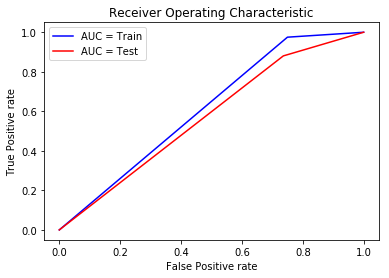

In [143]:
dec = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dec,param_grid=PARAMS, scoring='roc_auc',cv=3)
clf.fit(X_train,y_train)
param=clf.best_params_
best_depth=param['max_depth']
best_split=param['min_samples_split']
pred_test=clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)
print("Best parameters",param)
print("ROC Score",roc_score_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n Test accuracy %f%%' %(acc))
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
x.add_row(['TFIDF BOW','Decision Tree',best_depth,best_split,acc,roc_score_test])

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


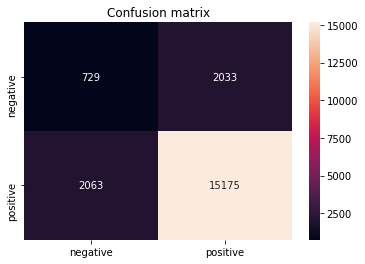

In [144]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

## Conclusion

In [145]:
print(x)

+------------+---------------+---------------+-----------+-------------------+--------------------+
| Vectorizer |     Model     |   mac_depth   | min_split |      Accuracy     |     ROC Score      |
+------------+---------------+---------------+-----------+-------------------+--------------------+
|    BOW     | Decision Tree |       50      |    500    | 87.72999999999999 | 0.6559395619818096 |
|   TFIDF    | Decision Tree |       50      |    500    |       86.885      | 0.6507335560869134 |
|  AVG BOW   | Decision Tree | ['max_depth'] |    500    |       81.61       | 0.6038661448751848 |
| TFIDF BOW  | Decision Tree |      500      |    500    |       79.52       | 0.5721308588648473 |
+------------+---------------+---------------+-----------+-------------------+--------------------+


***********Thanks***************